pca降维处理

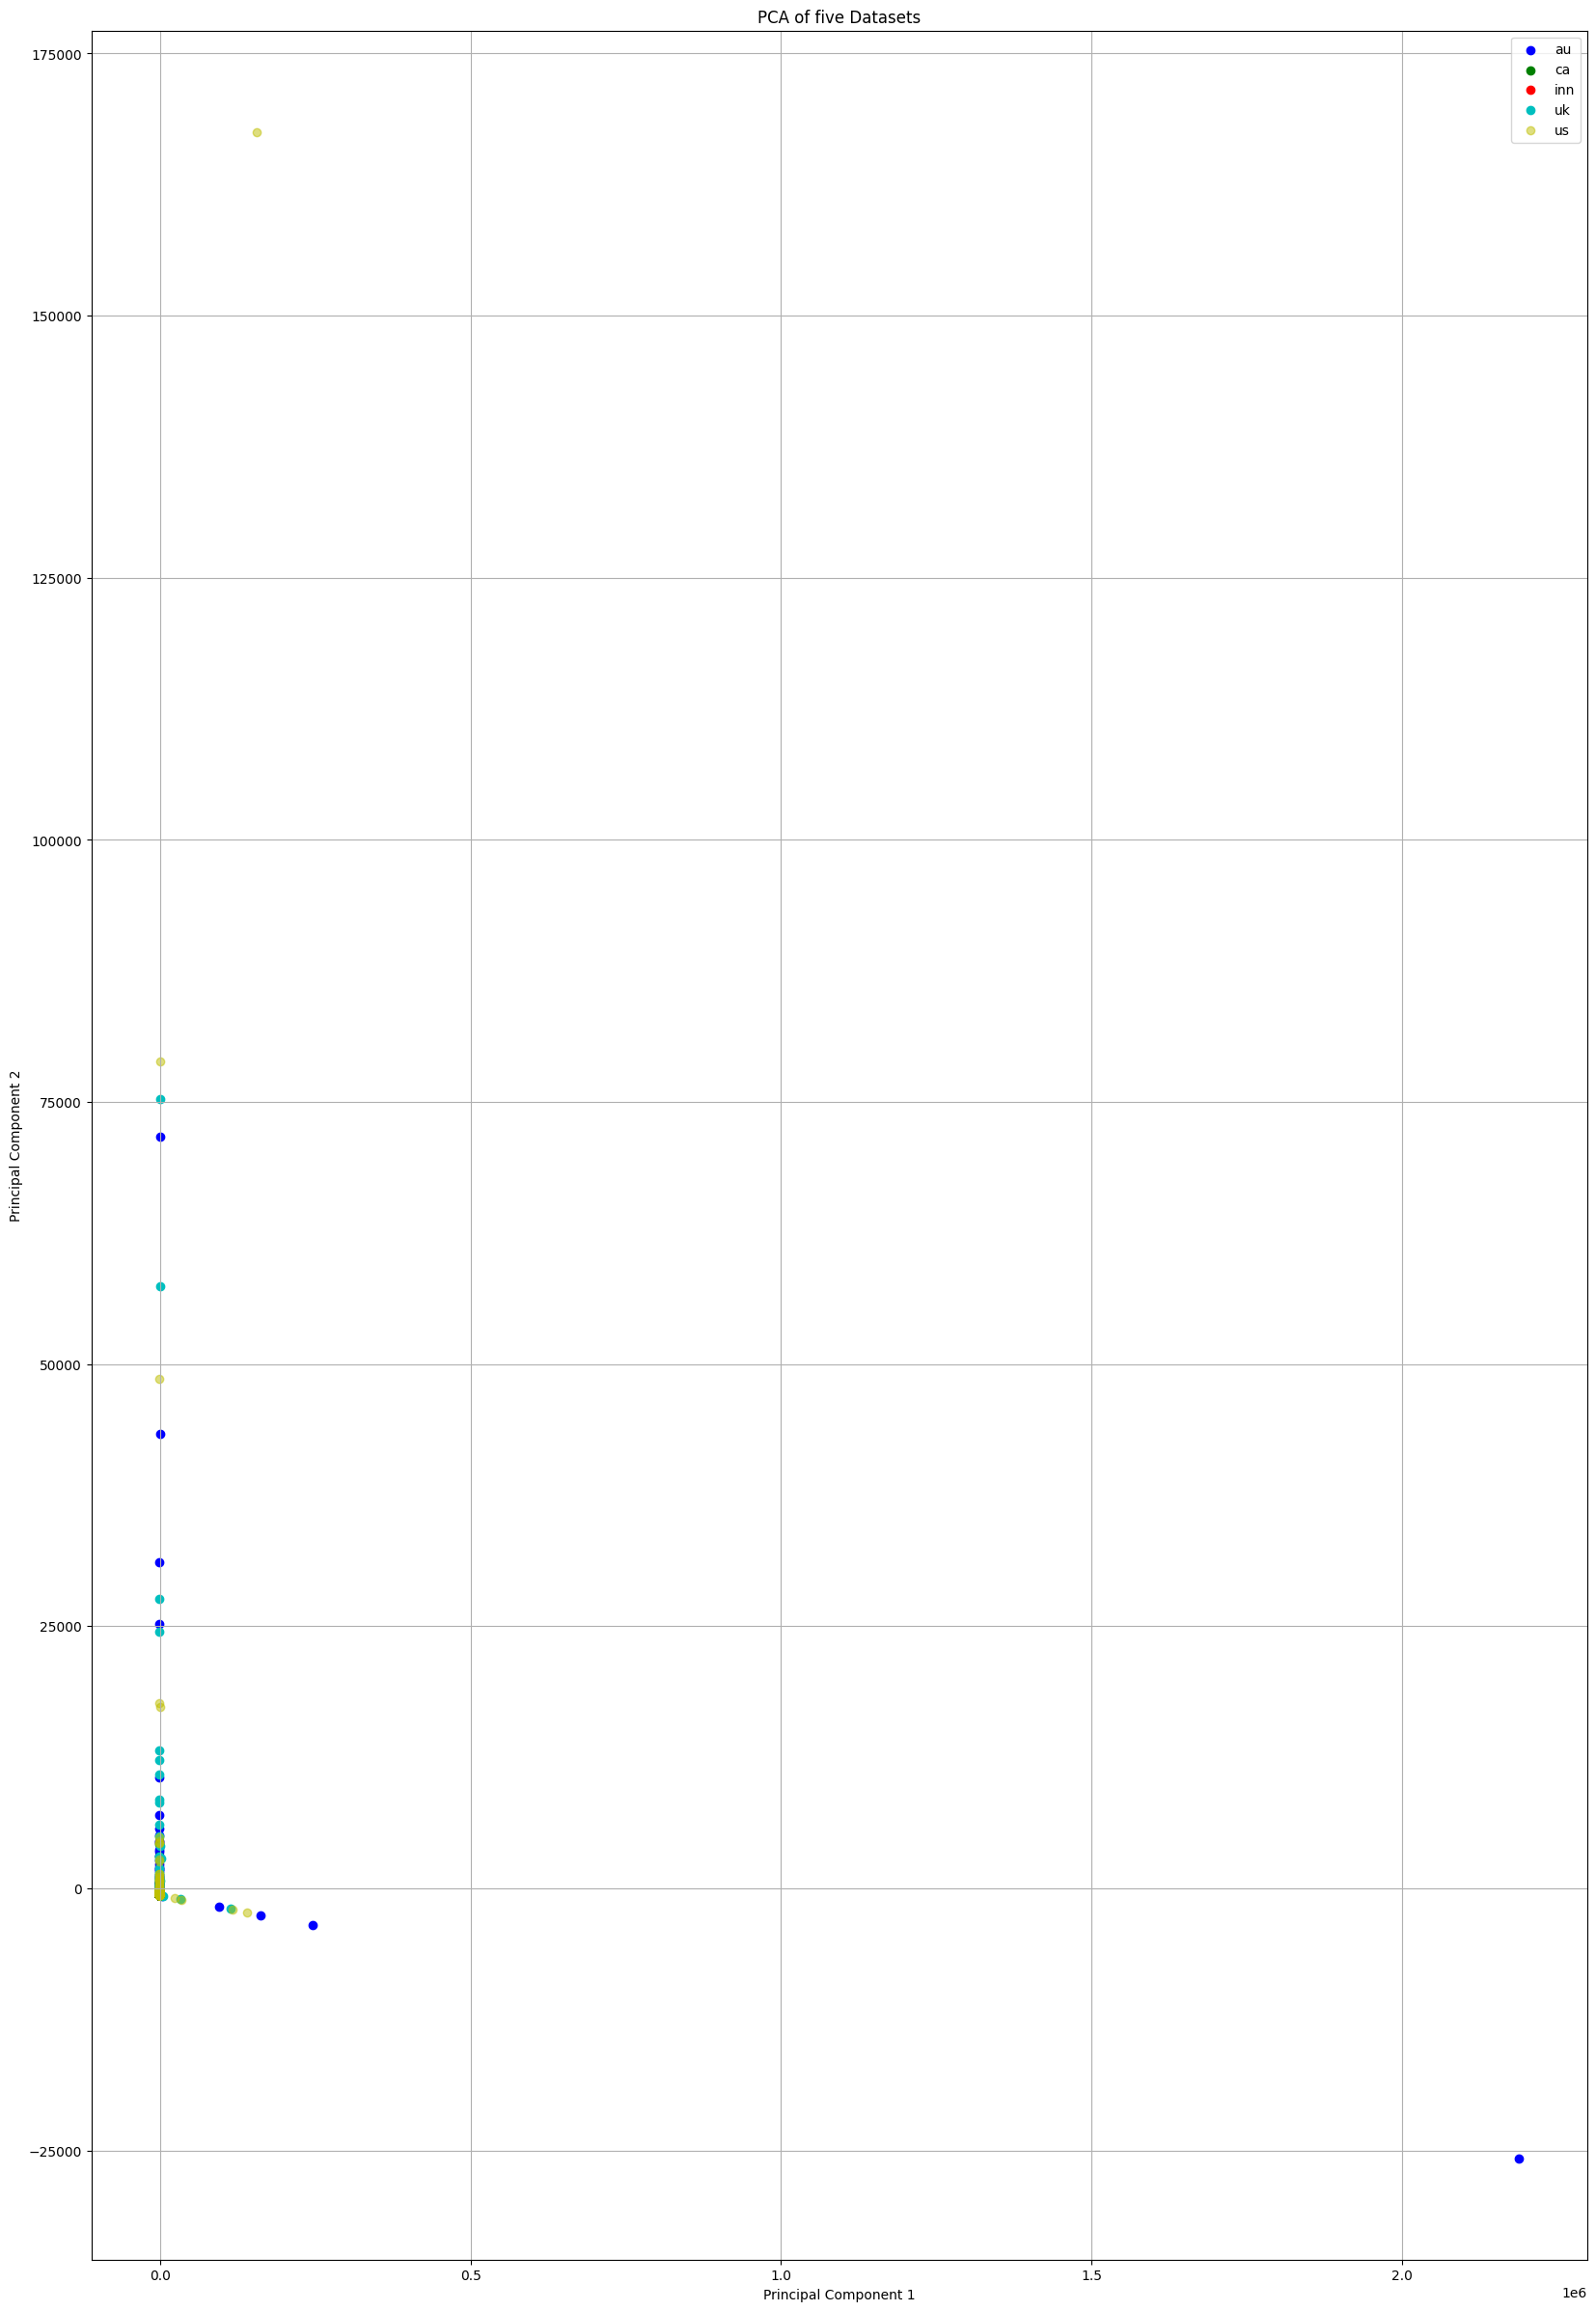

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import csv
# 假设有三个数据集，每个数据集都是一个矩阵，行数相同
def to_ndarray(input_file):
    with open(input_file, 'r', newline='') as csvfile:
         reader = csv.reader(csvfile)
         data = list(reader) 
    for row in data:
        del row[14]
        del row[12]
        del row[5]
        del row[5]
       # row=[cell.replace('"', '') for cell in row]
        row=[cell.replace('\\n', '') for cell in row]
    sum=0
    
    data_array = np.array(data, dtype=float)
    return data_array

# 生成三个随机数据集
au=to_ndarray('output_au.csv')
ca=to_ndarray('output_ca.csv')
inn=to_ndarray('output_in.csv')
uk=to_ndarray('output_uk.csv')
us=to_ndarray('output_us.csv')
s_au=au.shape[0]
s_ca=ca.shape[0]
s_inn=inn.shape[0]
s_uk=uk.shape[0]
s_us=us.shape[0]


# 合并三个数据集为一个大的数据矩阵
all_data = np.vstack([au,ca,inn,uk,us])

# 创建PCA对象，指定保留的主成分数量为2
pca = PCA(n_components=10)

# 在所有数据上进行PCA
principal_components = pca.fit_transform(all_data)

# 提取每个数据集对应的主成分数据
pc_data1 = principal_components[:s_au]
pc_data2 = principal_components[s_au:s_ca]
pc_data3 = principal_components[s_ca:s_inn]
pc_data4=principal_components[s_inn:s_uk]
pc_data5=principal_components[s_uk:]

# 可视化主成分分析结果
plt.figure(figsize=(20, 30))
plt.scatter(pc_data1[:1000, 0], pc_data1[:1000, 1], color='b', label='au', alpha=1)
plt.scatter(pc_data2[:1000, 0], pc_data2[:1000, 1], color='g', label='ca', alpha=1)
plt.scatter(pc_data3[:1000, 0], pc_data3[:1000, 1], color='r', label='inn', alpha=1)
plt.scatter(pc_data4[:1000, 0], pc_data4[:1000, 1], color='c', label='uk', alpha=1)
plt.scatter(pc_data5[:1000, 0], pc_data5[:1000, 1], color='y', label='us', alpha=0.5)
plt.title('PCA of five Datasets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
有效因子分析与碎石图

               0             1            2           3           4
0       0.029400      0.023741     0.008918    0.116116   -0.074469
1      -0.005064      0.047394     0.030879    0.435426    0.116667
2      -0.004338      0.042364     0.018404    0.082111   -0.070966
3       0.024788      0.050115    -0.020343    0.343315    0.016050
4       0.003425     -0.019681    -0.032211   -0.143038    0.175270
5      -7.126274      2.556204    -1.203336  529.102552  -31.169275
6      -0.986977      0.149345    -0.989974  136.859183  120.477082
7     428.466974  17348.344060  -781.988041   -0.089843    0.002133
8     458.375326   1981.529679  6839.540674    0.103491    0.012170
9   41691.974222   -200.072522   -67.159666    0.093417   -0.002630
10     -0.157327      0.045093     0.009280   -0.460169    0.091128
11      0.002218     -0.005170     0.000204    0.008629    0.038527
12      0.002235     -0.005205     0.000214    0.008622    0.038713
13      0.002199     -0.005133     0.000192    0

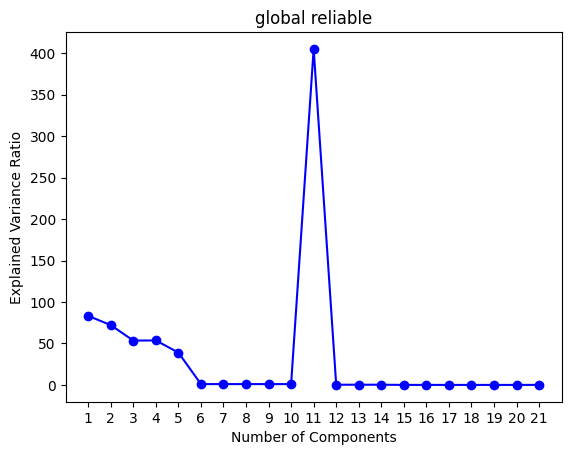

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, classification_report
import math
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
import random
def clean_and_convert(x):
    if isinstance(x, str):
        x = x.replace('"', '').replace("'", '')  # 去除单引号和双引号
        return float(x)  # 转换为浮点数
    else:
        return float(x)  # 如果是整数，直接转换为浮点数
def to_pd(input):
    df = pd.read_csv(input)
    #一下数据与本次问题无关
    df=df.drop(df.columns[14],axis=1)
    df=df.drop(df.columns[12],axis=1)
    df=df.drop(df.columns[5],axis=1)
    df=df.drop(df.columns[5],axis=1)  
    df=df.applymap(clean_and_convert)
    return df

df1=to_pd('output_au.csv')
df2=to_pd('output_ca.csv')
df3=to_pd('output_uk.csv')
df4=to_pd('output_us.csv')
df5=to_pd('output_in.csv')



# 进行因子分析
fa = FactorAnalysis(n_components=5)
df=np.vstack([df1,df2,df3,df4,df5])
fa.fit(df)
df=pd.DataFrame(df)
# 查看因子负荷矩阵
loadings = pd.DataFrame(fa.components_.T, index=df.columns)
print(loadings)

# 绘制碎石图（Scree Plot）
evr = fa.noise_variance_
plt.plot(np.arange(1, len(evr) + 1), evr, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(evr) + 1))
plt.title('global reliable')
plt.show()

一致性检验

In [3]:
from pingouin import reliability

# 计算 Cronbach's α
alpha = reliability.cronbach_alpha(df[0:5])

print(f"Cronbach's α: {alpha}")


Cronbach's α: (0.39020902937607754, array([-0.799,  0.927]))
